In [1]:
# 0314 regression

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
df = pd.DataFrame(X,columns = boston.feature_names)
df['MEDV']=y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [5]:
chas_df = pd.get_dummies(df['CHAS'])
chas_df
chas_df.columns = ['CHAS_0','CHAS_1']
chas_df

,CHAS_0,CHAS_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
501,1,0
502,1,0
503,1,0
504,1,0


In [6]:
df2 = df.join([chas_df])
df2 =df2.drop(columns='CHAS')
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [7]:
y = df2['MEDV']
X = df2.drop(columns= 'MEDV')
X.shape, y.shape

((506, 14), (506,))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

train_columns = X_train.columns
train_columns 


Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [9]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_metrics(y, y_pred, title = None):
  mse = np.round(mean_squared_error(y, y_pred), 3)
  rmse = np.round(np.sqrt(mse), 3)
  mae = np.round(mean_absolute_error(y, y_pred), 3)
  r2 = np.round(r2_score(y, y_pred), 3)

  if title: 
    print(title)
  print(f"MSE:{mse}, RMSE:{rmse}, MAE:{mae}, R2:{r2}")


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
print(lr.coef_)

[-0.86162538  1.04252274  0.12712196 -2.31984983  2.64400306  0.38654105
 -2.81696668  2.36033963 -2.0827862  -2.04966629  0.85535161 -3.53900944
 -0.26645455  0.26645455]


In [13]:
lr.intercept_

22.386138613861387

In [14]:
np.mean(y)

22.532806324110677

In [15]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_metrics(y_train, pred_train, title='Train')
print_metrics(y_test, pred_test, title='Test')

Train
MSE:20.696, RMSE:4.549, MAE:3.193, R2:0.75
Test
MSE:29.161, RMSE:5.4, MAE:3.551, R2:0.678


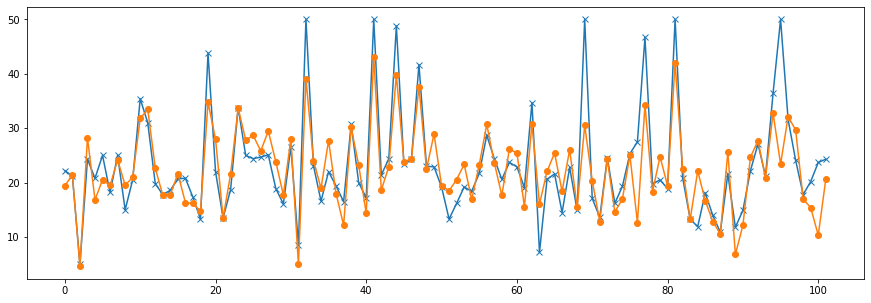

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test ,label='실제값', marker='x')
plt.plot(range(len(pred_test)), pred_test ,label='예측값', marker='o')
plt.show()

In [17]:
import matplotlib as mpl

mpl.rcParams['font.family']='malgun gothic'
mpl.rcParams['axes.unicode_minus']=False

In [18]:
m = 100
X = 6* np.random.rand(m,1)-3
y = X**2 + X + 2 + np.random.normal(0,1,size=(m,1))

X.shape, y.shape

((100, 1), (100, 1))

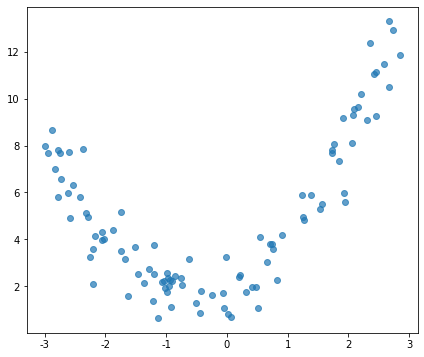

In [19]:
plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.7)
plt.show()

In [20]:
lr.fit(X,y)
lr.coef_, lr.intercept_

(array([[0.81713451]]), array([5.15488167]))

In [21]:
pred = lr.predict(X)

X_new = np.linspace(-3,3, 100).reshape(-1,1)
pred_new = lr.predict(X_new)

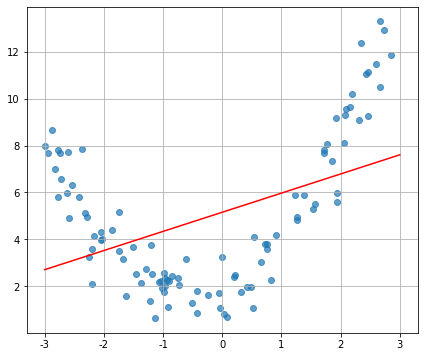

In [22]:
plt.figure(figsize=(7, 6))
plt.scatter(X, y, alpha = 0.7)
plt.plot(X_new, pred_new, color='red')
plt.grid(True)
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_f = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_f.fit_transform(X)

X_poly.shape

(100, 2)

In [24]:
X[:5]

array([[ 1.25999011],
       [-0.72955629],
       [-1.19466995],
       [ 0.0249305 ],
       [-1.01995754]])

In [25]:
X_poly[:5]

array([[ 1.25999011e+00,  1.58757509e+00],
       [-7.29556294e-01,  5.32252386e-01],
       [-1.19466995e+00,  1.42723630e+00],
       [ 2.49304980e-02,  6.21529730e-04],
       [-1.01995754e+00,  1.04031339e+00]])

In [26]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)
lr2.coef_, lr2.intercept_

(array([[1.04190874, 1.0376307 ]]), array([1.95647457]))

In [27]:
pred2 = lr2.predict(X_poly)

In [28]:
X_new_poly = poly_f.transform(X_new)
y_new2 = lr2.predict(X_new_poly)

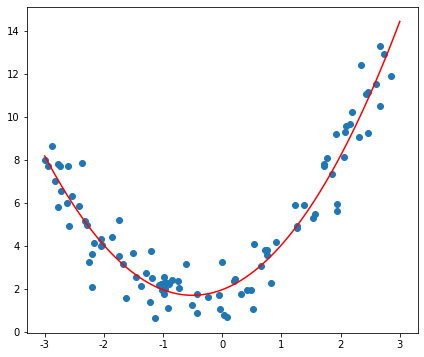

In [29]:
plt.figure(figsize=(7,6))
plt.scatter(X,y)
plt.plot(X_new, y_new2, color='red')
plt.show()

In [30]:
# 0320

In [31]:
from sklearn.linear_model import Ridge
ridge_1 = Ridge(alpha = 25)
ridge_1.fit(X_train_scaled, y_train)

pred_train = ridge_1.predict(X_train_scaled)
pred_test = ridge_1.predict(X_test_scaled)

In [32]:
print_metrics(y_train, pred_train, title='1:train')
print_metrics(y_test, pred_test, title='1:test')

1:train
MSE:21.082, RMSE:4.592, MAE:3.164, R2:0.745
1:test
MSE:30.392, RMSE:5.513, MAE:3.551, R2:0.664


In [33]:
print_metrics(y_train, pred_train, title='25:train')
print_metrics(y_test, pred_test, title='25:test')

25:train
MSE:21.082, RMSE:4.592, MAE:3.164, R2:0.745
25:test
MSE:30.392, RMSE:5.513, MAE:3.551, R2:0.664


In [34]:
from sklearn.model_selection import GridSearchCV

param = {'alpha': [0.01, 0.1 , 0, 5, 10, 100]}
ridge = Ridge()
gs = GridSearchCV(ridge, param_grid = param, cv=5, n_jobs=-1, scoring = ['r2','neg_mean_squared_error'], refit='r2')

gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0, 5, 10, 100]}, refit='r2',
             scoring=['r2', 'neg_mean_squared_error'])

In [35]:
cv_result = pd.DataFrame(gs.cv_results_).sort_values('rank_test_neg_mean_squared_error')
cv_result.filter(like='mean_test').join(cv_result.filter(like='param'))

,mean_test_r2,mean_test_neg_mean_squared_error,param_alpha,params
4,0.710191,-23.825111,10,{'alpha': 10}
3,0.709009,-23.878710,5,{'alpha': 5}
1,0.706887,-24.004020,0.1,{'alpha': 0.1}
0,0.706834,-24.007410,0.01,{'alpha': 0.01}
2,0.706142,-24.020836,0,{'alpha': 0}
5,0.699382,-25.109358,100,{'alpha': 100}


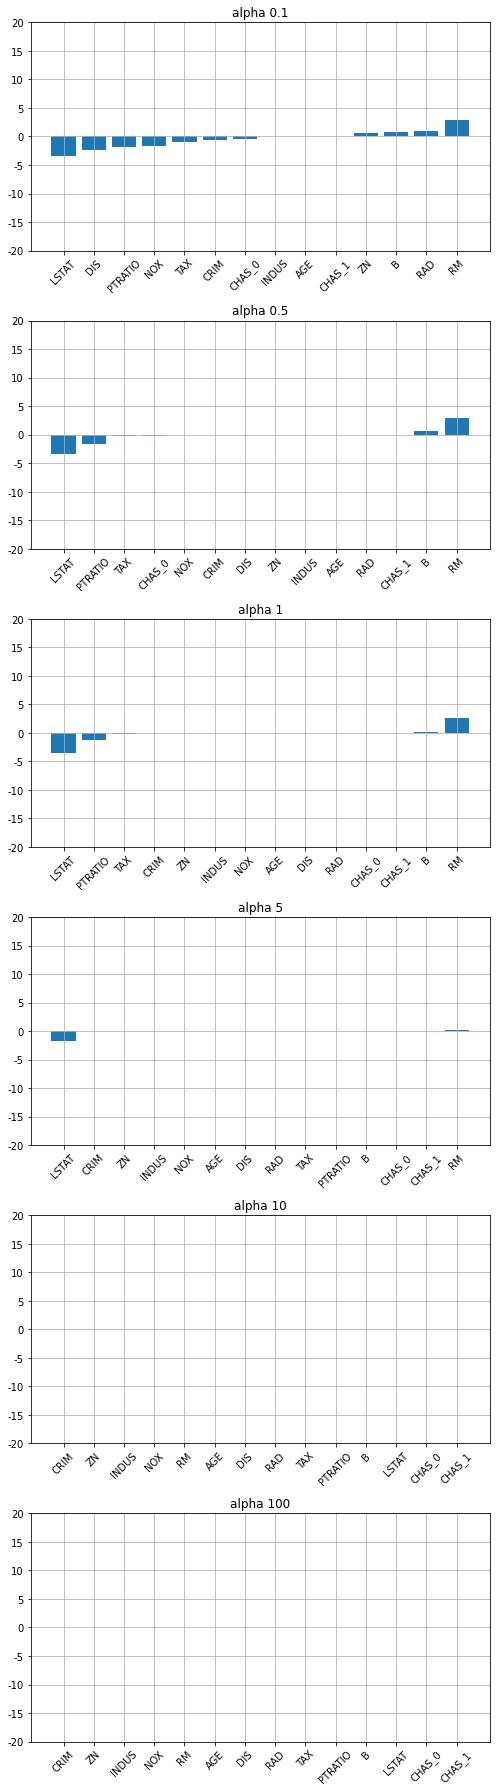

In [36]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

alpha_list=[0.1, 0.5, 1, 5, 10, 100]
lasso_coef_df = pd.DataFrame()

plt.figure(figsize = (7, 25))
for idx, alpha in enumerate(alpha_list, start=1):
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_scaled, y_train)

  w = pd.Series(lasso.coef_, index=X_train.columns).sort_values()
  lasso_coef_df[f'alpha {alpha}'] = w
  plt.subplot(6,1,idx)

  plt.bar(x=w.index, height=w)
  plt.xticks(rotation = 45)
  plt.ylim(-20, 20)
  plt.grid(True)
  plt.title(f'alpha {alpha}')

  plt.tight_layout()
  plt.show

In [37]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha = 0.1 , l1_ratio = 0.6)
elastic.fit(X_train_scaled, y_train)

pred_train = elastic.predict(X_train_scaled)
pred_test = elastic.predict(X_test_scaled)

print_metrics(y_train, pred_train, title='train')
print_metrics(y_test, pred_test, title='test')

train
MSE:21.253, RMSE:4.61, MAE:3.164, R2:0.743
test
MSE:30.378, RMSE:5.512, MAE:3.545, R2:0.665


In [38]:
# logistic regression

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=1)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# C값과 규제는 반비례
lr = LogisticRegression(C=1, random_state=1) # max_iter() --> dafault=100, penalty() --> 디폴트는 릿지(l2)
lr.fit(X_train_scaler, y_train)

LogisticRegression(C=1, random_state=1)

In [40]:
pred_train = lr.predict(X_train_scaler)
pred_test = lr.predict(X_test_scaler)

In [41]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9906103286384976, 0.972027972027972)

In [42]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       159
           1       0.99      1.00      0.99       267

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus']= True

from sklearn.datasets import load_iris
data = load_iris()
X, y = data['data'], data['target']

# k-means 는 scaler만
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=1)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=1)

In [45]:
cluster = kmeans.labels_
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [46]:
new_data = [[0.8, 0.9, 1.5, 3.7],
            [3, 4, 7, 1]
          ]
kmeans.predict(new_data)

array([2, 2], dtype=int32)

In [47]:
df = pd.DataFrame(X, columns = data['feature_names'])
df['cluster']= cluster
df['y']=y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,y
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [48]:
df['cluster'].value_counts()

0    53
1    50
2    47
Name: cluster, dtype: int64

In [49]:
#inertia
kmeans.inertia_

139.82049635974982

In [50]:
k_list = range(2, 10)
inertia_list=[]
for k in k_list:
  model = KMeans(n_clusters=k, random_state=1)
  model.fit(X_scaled)
  inertia_list.append(model.inertia_)

In [51]:
inertia_list

[222.36170496502302,
 139.82049635974982,
 114.35407164049776,
 90.87938887858559,
 81.62020874070211,
 70.68226933956178,
 62.99276018914061,
 55.036240671487725]

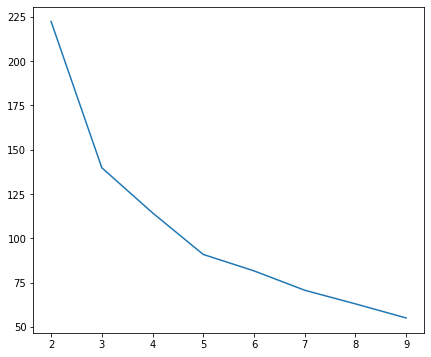

In [52]:
plt.figure(figsize=(7,6))
plt.plot(k_list, inertia_list)
plt.xticks(k_list)
plt.show()

In [53]:
silhouette coefficient
silhouette_samples(X_train)
silhouette_score(X_) # 평균의 값이 1에 가까울수록 잘 분류

SyntaxError: ignored